<a href="https://colab.research.google.com/github/AIhexNICK-MAIL-RU/ML-projects-new/blob/main/Net_lab_w1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание

# Цель:
Вспомнить и применить знания, полученные на протяжении всего курса. Получить полноценную работу, объединяющую в себе основные методики по работе с данными и алгоритмы машинного обучения.

# Описание задания:
В лабораторной работе предлагается решить задачу классификации. Данные для выполнения работы можно скачать по ссылке, нажав на Data Folder. В датасете находится информация о флаге и базовых показателях страны. На основе доступной информации решается задача классификации стран по религии. Целевой признак мультиклассовый – religion. Остальные признаки описывают характерные черты флага и самой страны. Подробное описание признаков и их возможные значения можно прочесть на сайте.

Решение работы не высылается и будет разобрано на лекции.
# Этапы работы:

# 1 Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую)

In [ ]:
import numpy as np
import pandas as pd # Для работы с данными
import scipy.stats # При работе со статистикой
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов
import seaborn as sns

In [ ]:
data = pd.read_csv('flag2.csv', delimiter=';')
data.head()

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red


In [ ]:
print(data.shape)

(194, 30)


# 2 Проведите первичный разведочный анализ данных.

## a) Проверьте данные на пропуски.

In [ ]:
data.isna().sum()

name          0
landmass      0
zone          0
area          0
population    0
language      0
religion      0
bars          0
stripes       0
colours       0
red           0
green         0
blue          0
gold          0
white         0
black         0
orange        0
mainhue       0
circles       0
crosses       0
saltires      0
quarters      0
sunstars      0
crescent      0
triangle      0
icon          0
animate       0
text          0
topleft       0
botright      0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        194 non-null    object
 1   landmass    194 non-null    int64 
 2   zone        194 non-null    int64 
 3   area        194 non-null    int64 
 4   population  194 non-null    int64 
 5   language    194 non-null    int64 
 6   religion    194 non-null    int64 
 7   bars        194 non-null    int64 
 8   stripes     194 non-null    int64 
 9   colours     194 non-null    int64 
 10  red         194 non-null    int64 
 11  green       194 non-null    int64 
 12  blue        194 non-null    int64 
 13  gold        194 non-null    int64 
 14  white       194 non-null    int64 
 15  black       194 non-null    int64 
 16  orange      194 non-null    int64 
 17  mainhue     194 non-null    object
 18  circles     194 non-null    int64 
 19  crosses     194 non-null    int64 
 20  saltires  

In [ ]:
data.describe()

,landmass,zone,area,population,language,religion,bars,stripes,colours,red,...,circles,crosses,saltires,quarters,sunstars,crescent,triangle,icon,animate,text
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,...,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,3.572165,2.211340,700.046392,23.268041,5.340206,2.190722,0.453608,1.551546,3.463918,0.788660,...,0.170103,0.149485,0.092784,0.149485,1.386598,0.056701,0.139175,0.252577,0.201031,0.082474
std,1.553018,1.308274,2170.927932,91.934085,3.496517,2.061167,1.038339,2.328005,1.300154,0.409315,...,0.463075,0.385387,0.290879,0.435860,4.396186,0.231869,0.347025,0.435615,0.401808,0.275798
min,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.000000,9.000000,0.000000,2.000000,1.000000,0.000000,0.000000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,2.000000,111.000000,4.000000,6.000000,1.000000,0.000000,0.000000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,4.000000,471.250000,14.000000,9.000000,4.000000,0.000000,3.000000,4.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.750000,0.000000,0.000000
max,6.000000,4.000000,22402.000000,1008.000000,10.000000,7.000000,5.000000,14.000000,8.000000,1.000000,...,4.000000,2.000000,1.000000,4.000000,50.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## b) Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака).

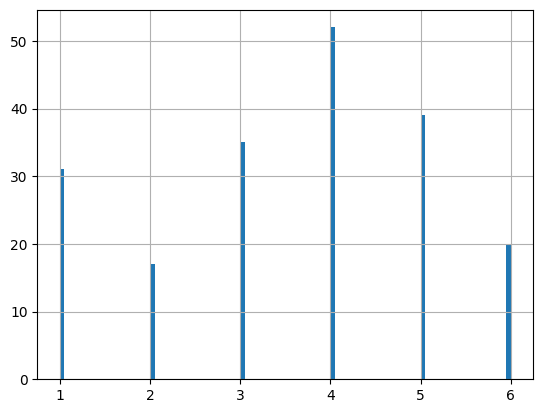

In [ ]:
data['landmass'].hist(bins=100)
plt.show()

In [ ]:
def get_boxplot(X, columns=[]):
    for i in columns:
        sns.boxplot(x=X[i])
    pass

def get_pairplot(X, columns=None):
    if columns is None:
        columns = list(X.columns)
    sns.pairplot(X[columns])
    pass

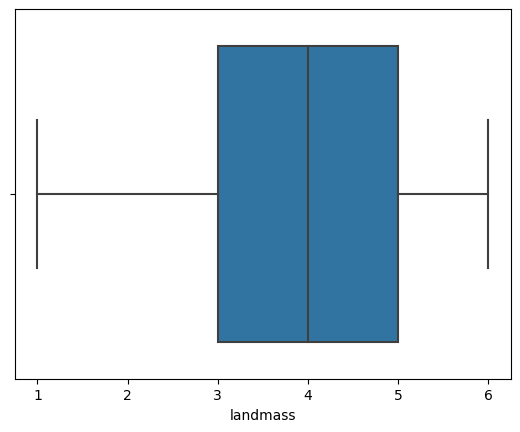

In [ ]:
get_boxplot(data, columns=['landmass'])

## c) Визуализируйте распределение количества флагов по религиям.

Text(0.5, 1.0, 'распределение количества флагов по религиям')

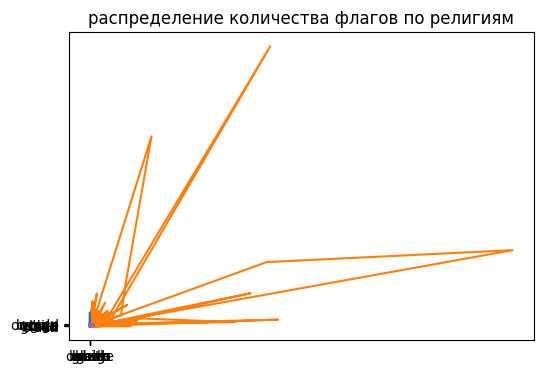

In [ ]:
plt.figure(figsize=(6,4))

plt.plot(data['landmass'],
            data['zone'],
            data['area'],
            data['population'],
            data['language'] ,
        data['religion'],
         data['bars'],
         data['stripes'],
         data['colours'],
          data['red'],
          data['green'],
          data['blue'],
          data['gold']      ,
          data['white']    ,
          data['black'] ,
          data['orange']    ,
          data['mainhue']    ,
          data['circles']   ,
          data['crosses']     ,
          data['saltires']  ,
          data['quarters']   ,
          data['sunstars']    ,
          data['crescent']     ,
          data['triangle']      ,
          data['icon']          ,
          data['animate']       ,
          data['text']          ,
          data['topleft']       ,
          data['botright'])

plt.title('распределение количества флагов по религиям')
# plt.xlabel('Месяц')
# plt.ylabel('Кол-во клиентов');

# 3 Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
ohe = OneHotEncoder()

In [ ]:
ft0 = pd.DataFrame(le.fit_transform(data[['name']]))
ft0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       194 non-null    int64
dtypes: int64(1)
memory usage: 1.6 KB


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
ft1 = pd.DataFrame(le.fit_transform(data[['mainhue']]))
ft1.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,0
0,4
1,6
2,4
3,1
4,3


In [ ]:
ft2 = pd.DataFrame(le.fit_transform(data[['topleft']]))
ft2.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,0
0,0
1,5
2,3
3,1
4,1


In [ ]:
ft3 = pd.DataFrame(le.fit_transform(data[['botright']]))
ft3.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,0
0,4
1,6
2,7
3,6
4,6


In [ ]:
df1 = data[[
      'landmass',
      'zone',
      'area',
      'population',
      'language',
      'religion',
      'bars',
      'stripes',
      'colours',
      'red',
      'green',
      'blue',
      'gold',
      'white',
      'black',
      'orange',
      'circles',
      'crosses',
      'saltires',
      'quarters',
      'sunstars',
      'crescent',
      'triangle',
      'icon',
      'animate',
      'text']]

In [ ]:
df1.head()
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   landmass    194 non-null    int64
 1   zone        194 non-null    int64
 2   area        194 non-null    int64
 3   population  194 non-null    int64
 4   language    194 non-null    int64
 5   religion    194 non-null    int64
 6   bars        194 non-null    int64
 7   stripes     194 non-null    int64
 8   colours     194 non-null    int64
 9   red         194 non-null    int64
 10  green       194 non-null    int64
 11  blue        194 non-null    int64
 12  gold        194 non-null    int64
 13  white       194 non-null    int64
 14  black       194 non-null    int64
 15  orange      194 non-null    int64
 16  circles     194 non-null    int64
 17  crosses     194 non-null    int64
 18  saltires    194 non-null    int64
 19  quarters    194 non-null    int64
 20  sunstars    194 non-null    int6

In [ ]:
# df_row_concat = pd.DataFrame(df1 & ft0 & ft1 & ft2 & ft3)
df_row_concat = pd.concat([df1, ft0, ft1, ft2, ft3],axis=1)
df_row_concat.head()

,landmass,zone,area,population,language,religion,bars,stripes,colours,red,...,sunstars,crescent,triangle,icon,animate,text,0,0,0,0
0,5,1,648,16,10,2,0,3,5,1,...,1,0,0,1,0,0,0,4,0,4
1,3,1,29,3,6,6,0,0,3,1,...,1,0,0,0,1,0,1,6,5,6
2,4,1,2388,20,8,2,2,0,3,1,...,1,1,0,0,0,0,2,4,3,7
3,6,3,0,0,1,1,0,0,5,1,...,0,0,1,1,1,0,3,1,1,6
4,3,1,0,0,6,0,3,0,3,1,...,0,0,0,0,0,0,4,3,1,6


In [ ]:
X = df_row_concat
y = df_row_concat.religion

In [ ]:
X.columns = X.columns.astype(str)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 4 Обучите любую модель классификации на выбор.

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
pred = model.predict(X)
pred

array([2, 2, 2, 1, 2, 5, 1, 0, 0, 0, 1, 2, 1, 2, 4, 1, 2, 1, 2, 1, 2, 1,
       5, 0, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 5, 1, 0, 2, 0, 1, 2, 1, 0, 2,
       2, 2, 2, 1, 1, 0, 0, 2, 0, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 6,
       0, 1, 2, 1, 1, 1, 0, 1, 1, 1, 0, 1, 2, 2, 1, 4, 2, 2, 2, 1, 2, 2,
       1, 1, 4, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 2, 0, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1,
       2, 1, 1, 1, 1, 2, 2, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       2, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 2, 1, 0, 0, 1, 1])

In [ ]:
# from sklearn.tree import DecisionTreeClassifier

# 5 Для тестового множества сделайте предсказание целевой переменной. Выведите метрики модели с помощью metrics.classification_report. Можно использовать любой другой альтернативный метод подсчета метрик.

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(X['religion'], X['language']))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        40
           1       0.84      0.60      0.70        60
           2       0.00      0.00      0.00        36
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00        27
           6       0.10      0.20      0.13        15
           7       0.00      0.00      0.00         4
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0

    accuracy                           0.20       194
   macro avg       0.09      0.07      0.08       194
weighted avg       0.27      0.20      0.23       194



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

# 6 Посчитайте и выведите корреляционную матрицу. Убедитесь, что ячейки матрицы поделены на цветные категории, в ячейках указано числовое значение корреляции.

In [ ]:
import seaborn as sns

In [ ]:
corr_matrix = X.corr()
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0
corr_matrix

,landmass,zone,area,population,language,religion,bars,stripes,colours,red,...,sunstars,crescent,triangle,icon,animate,text,0,0,0,0
landmass,1.0,-0.6,0.0,0.0,0.5,0.3,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zone,-0.6,1.0,0.0,0.0,-0.6,-0.3,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
area,0.0,0.0,1.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
population,0.0,0.0,0.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
language,0.5,-0.6,0.0,0.0,1.0,0.4,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
religion,0.3,-0.3,0.0,0.0,0.4,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
bars,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.3,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
stripes,0.0,0.0,0.0,0.0,0.0,0.0,-0.3,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
colours,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.3,...,0.0,0.0,0.0,0.5,0.5,0.4,0.0,0.0,0.0,0.0
red,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3,0.3


Text(0.5, 1.0, 'Correlation matrix')

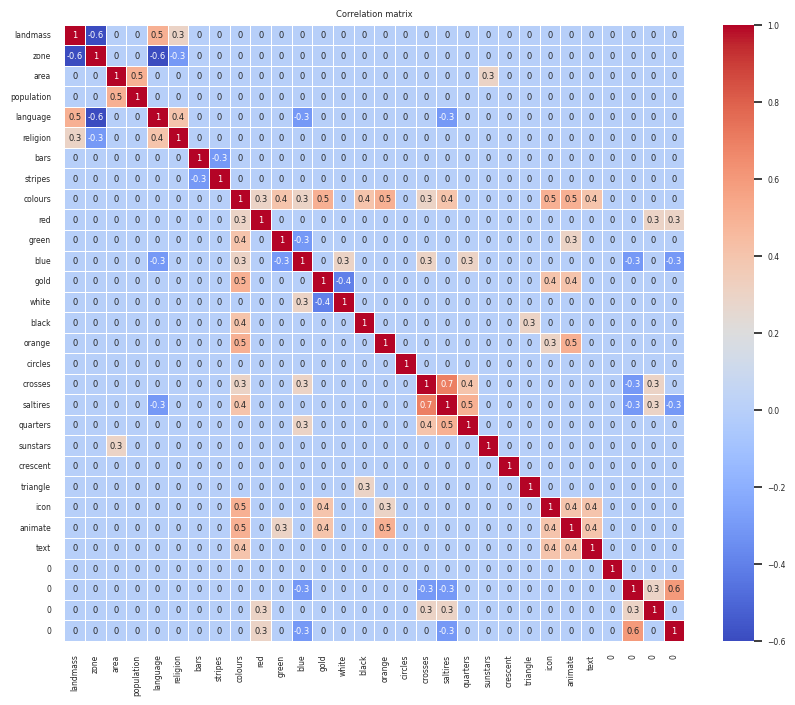

In [ ]:
plt.figure(figsize=(10, 8))

sns.set(font_scale=0.5)

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')

## a) Сделайте выводы.

In [ ]:
pred_df = pd.DataFrame({
    'ground truth': y,
    'prediction': pred
})

pred_df

,ground truth,prediction
0,2,2
1,6,2
2,2,2
3,1,1
4,0,2
...,...,...
189,1,1
190,6,0
191,5,0
192,5,1


# 7 Обработайте выбросы в данных.

## a) Визуализируйте распределение значений для каждой переменной. Можно использовать функции sns.boxplot, sns.distplot.

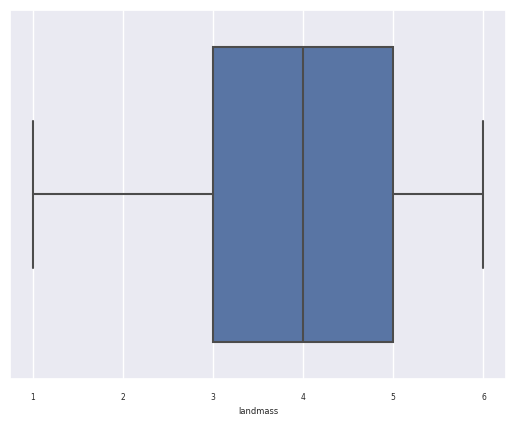

In [ ]:
get_boxplot(X, columns=['landmass'])

In [ ]:
# sns.pairplot(data, hue='Type', diag_kind="kde"); # hue='' подсвечивает указанную категорию другим цветом

In [ ]:
# sns.boxplot(X)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   landmass    194 non-null    int64
 1   zone        194 non-null    int64
 2   area        194 non-null    int64
 3   population  194 non-null    int64
 4   language    194 non-null    int64
 5   religion    194 non-null    int64
 6   bars        194 non-null    int64
 7   stripes     194 non-null    int64
 8   colours     194 non-null    int64
 9   red         194 non-null    int64
 10  green       194 non-null    int64
 11  blue        194 non-null    int64
 12  gold        194 non-null    int64
 13  white       194 non-null    int64
 14  black       194 non-null    int64
 15  orange      194 non-null    int64
 16  circles     194 non-null    int64
 17  crosses     194 non-null    int64
 18  saltires    194 non-null    int64
 19  quarters    194 non-null    int64
 20  sunstars    194 non-null    int6

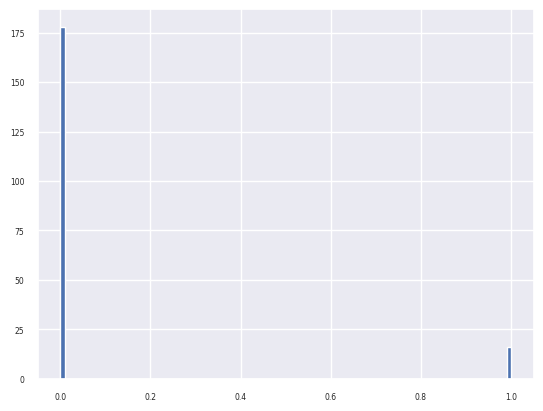

In [ ]:
# итог:
X['text'].hist(bins=100) # выбросы примерно после 1.530, хотя можно оставить и без изменений
# X['area'].hist(bins=100) # 1 выбросы начинаются после 1500, хотя можно оставить и без изменений
# X['population'].hist(bins=100)  # 2 выбросы начинаются после 400, хотя можно оставить и без изменений
# X['circles'].hist(bins=100)  # 3 выбросы начинаются после 1.5, хотя можно оставить и без изменений
# data['K'].hist(bins=100)  # выбросы начинаются после 3
# data['Ca'].hist(bins=100)  # выбросы начинаются после 15.9
# data['Ba'].hist(bins=100)  # непонятно где выбросы, думаю, что можно оставить без изменений
# data['Fe'].hist(bins=100)  # непонятно где выбросы, думаю, что можно оставить без изменений
# data['Type'].hist(bins=100)  # непонятно где выбросы, думаю, что можно оставить без изменений
sns.set(plt.show())

## b) Исследуйте признаки на выбросы. Удалите выбросы, если они были найдены/вы считаете это необходимым.

# 8 Проведите нормализацию признаков.

In [ ]:
from sklearn.pipeline import make_pipeline  # используем пайплайны для удобства
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

model = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000)
)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_test.index

In [ ]:
# обучаем на части датасета (train)

model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [ ]:
predictions[:5] # посмотрим как выглядят наши предсказания

In [ ]:
model.predict(X_test) # получаем массив

In [ ]:
model.predict_proba(X_test)

In [ ]:
model.score(X_train, y_train)

In [ ]:
model.score(X_test, y_test)

## a) Выберите признаки для нормализации, предложите способы для их обработки.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import NeighborhoodComponentsAnalysis

from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier

from sklearn.feature_selection import RFE
from sklearn.svm import SVR

In [ ]:
# автоматический отбор признаков методом ближайших соседей
knn = KNeighborsClassifier(n_neighbors=3) #
sfs = SequentialFeatureSelector(knn, n_features_to_select=3)
sfs.fit(X, y)

In [ ]:
knn.fit(X_train,y_train)
#y_pred = knn.predict(model2.transform(X_test))
print(knn.score(X_test, y_test))

# 9 Повторите п. 4, п. 5.

In [ ]:
# clf = DecisionTreeClassifier(max_depth=2)

In [ ]:
# clf.fit(X_train, y)

In [ ]:
# clf.predict(Xcut)

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

In [ ]:
pred = model.predict(X)
pred

# 10 Сбалансируйте классы путем oversampling/undersampling.

## a) Повторите п. 4, п. 5.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf1 = RandomForestClassifier(max_depth=2)

In [ ]:
clf1.fit(X, y)

In [ ]:
clf1.predict(X_train)

In [ ]:
clf1.predict(X_test)

In [ ]:
pred = clf1.predict(X)

In [ ]:
pred_df = pd.DataFrame({
    'ground truth': y,
    'prediction': pred
})

pred_df

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
rmse1 = np.sqrt(mean_squared_error(pred_df['ground truth'], pred_df['prediction']))
rmse1

In [ ]:
from sklearn.metrics import r2_score

r2_score1 = r2_score(pred_df['ground truth'], pred_df['prediction'])
r2_score1

In [ ]:
# model = LogisticRegression()

In [ ]:
# model.fit(X_train, y_train)

In [ ]:
# pred = model.predict(X)
# pred

# 11 Уменьшите размерность пространства признаков.

## a) Повторите п. 4, п. 5.

In [ ]:
# Создаем модель RandomForest
clf_rf = RandomForestRegressor(random_state=10)
clf_rf.fit(X_train, y_train)

In [ ]:
# проверяем полученные данные на тренировочных данных
clf_rf.score(X_train, y_train)

In [ ]:
# проверяем полученные данные на тестовых данных
clf_rf.score(X_test, y_test)

In [ ]:
# Выявляем наиболее важные признаки и выводим на график. Большое значение имеет признак Overall Qual, остальные почти равны нулю
imp = pd.Series(clf_rf.feature_importances_)

In [ ]:
imp.index = pd.Series(X_train.columns)

In [ ]:
imp = imp.sort_values(ascending=False)
imp

In [ ]:
plt.title('Top 5 feature importances')
plt.xlabel('Features')
plt.ylabel('Gini')
plt.bar(imp.head().index, imp.head())
plt.show()

In [ ]:
# model = LogisticRegression()

In [ ]:
# model.fit(X_train, y_train)

In [ ]:
# pred = model.predict(X)
# pred

# 12 Примените любой метод на ваше усмотрение для отбора признаков.

## a) Повторите п. 4, п. 5. Укажите количество выбранных признаков.

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

In [ ]:
pred = model.predict(X)
pred

# 13 Оптимизируйте параметры модели из п. 4.

## a) Повторите п. 4, п. 5.

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

In [ ]:
pred = model.predict(X)
pred

# 14 Обучите стекинг трех моделей, включая модель с оптимизированными параметрами.

# 15 Выберите результат с лучшими метриками и постройте для него Confusion Matrix.

In [ ]:
corr_matrix = X.corr()
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0
corr_matrix

In [ ]:
plt.figure(figsize=(10, 8))

sns.set(font_scale=0.5)

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')

# 16 *Творческий пункт. Предложите что-то интересное для датасета.

# 17 Сделайте выводы.

# Результат:
Реализована полноценная работа в области классического машинного обучения.

# черновик

In [ ]:
name
landmass
zone
area
population
language
religion
bars
stripes
colours
red
green
blue
gold
white
black
orange
mainhue
circles
crosses
saltires
quarters
sunstars
crescent
triangle
icon
animate
text
topleft
botright

In [ ]:
 'zone',
      'area',
      'population',
      'language',
      'religion',
      'bars',
      'stripes',
      'colours',
      'red',
      'green',
      'blue',
      'gold',
      'white',
      'black',
      'orange',

      'circles',
      'crosses',
      'saltires',
      'quarters',
      'sunstars',
      'crescent',
      'triangle',
      'icon',
      'animate',
      'text',


In [ ]:
name
'landmass'
'zone'
'area'
'population'
'language'
'religion'
'bars'
'stripes'
'colours'
'red'
'green'
'blue'
'gold'
'white'
'black'
'orange'
'mainhue'
'circles'
'crosses'
'saltires'
'quarters'
'sunstars'
'crescent'
'triangle'
'icon'
'animate'
'text'
'topleft'
'botright'

In [ ]:
name
landmass
zone
area
population
language
religion
bars
stripes
colours
red
green
blue
gold
white
black
orange
mainhue
circles
crosses
saltires
quarters
sunstars
crescent
triangle
icon
animate
text
topleft
botright